# Importing necessary libraries

In [34]:
import re

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt




# Loading data

In [35]:
train= pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')

In [36]:
test['price'] = -1

In [37]:
df = pd.concat([train,test])

In [38]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [39]:
df.tail()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
125685,314218,Mercedes-Benz,GL-Class GL 450 4MATIC,2014,83315,Gasoline,362.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Black,None reported,Yes,-1
125686,314219,Audi,Q7 55 Prestige,2019,29336,Gasoline,3.0 Liter Turbo,Automatic,White,Black,None reported,NaN,-1
125687,314220,Audi,A6 3.0T Premium Plus,2012,77634,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,-1
125688,314221,Audi,Q7 3.0T Premium,2012,112000,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,-1
125689,314222,Chevrolet,Tahoe LT,2018,66840,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Black,None reported,Yes,-1


In [40]:
df.shape

(314223, 13)

# Data Preprocessing Steps

## 1. lowercasing

In [41]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.lower()

In [42]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,mini,cooper s base,2007,213000,gasoline,172.0hp 1.6l 4 cylinder engine gasoline fuel,a/t,yellow,gray,none reported,yes,4200
1,1,lincoln,ls v8,2002,143250,gasoline,252.0hp 3.9l 8 cylinder engine gasoline fuel,a/t,silver,beige,at least 1 accident or damage reported,yes,4999
2,2,chevrolet,silverado 2500 lt,2002,136731,e85 flex fuel,320.0hp 5.3l 8 cylinder engine flex fuel capab...,a/t,blue,gray,none reported,yes,13900
3,3,genesis,g90 5.0 ultimate,2017,19500,gasoline,420.0hp 5.0l 8 cylinder engine gasoline fuel,transmission w/dual shift mode,black,black,none reported,yes,45000
4,4,mercedes-benz,metris base,2021,7388,gasoline,208.0hp 2.0l 4 cylinder engine gasoline fuel,7-speed a/t,black,beige,none reported,yes,97500


## 2. stripping

In [43]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.strip()

In [44]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,mini,cooper s base,2007,213000,gasoline,172.0hp 1.6l 4 cylinder engine gasoline fuel,a/t,yellow,gray,none reported,yes,4200
1,1,lincoln,ls v8,2002,143250,gasoline,252.0hp 3.9l 8 cylinder engine gasoline fuel,a/t,silver,beige,at least 1 accident or damage reported,yes,4999
2,2,chevrolet,silverado 2500 lt,2002,136731,e85 flex fuel,320.0hp 5.3l 8 cylinder engine flex fuel capab...,a/t,blue,gray,none reported,yes,13900
3,3,genesis,g90 5.0 ultimate,2017,19500,gasoline,420.0hp 5.0l 8 cylinder engine gasoline fuel,transmission w/dual shift mode,black,black,none reported,yes,45000
4,4,mercedes-benz,metris base,2021,7388,gasoline,208.0hp 2.0l 4 cylinder engine gasoline fuel,7-speed a/t,black,beige,none reported,yes,97500


## 3. splitting engine columns into hp, litre, cyclinder

In [45]:
def extract_engine_data(engine):
    hp_pattern = r'(\d+\.?\d*)hp'
    litre_pattern = r'(\d+\.?\d*)l'
    cylinder_pattern = r'(\d+)\scylinder'
    hp = re.search(hp_pattern, engine)
    litre = re.search(litre_pattern, engine)
    cylinder = re.search(cylinder_pattern, engine)

    hp_value = float(hp.group(1)) if hp else None
    litre_value = float(litre.group(1)) if litre else None
    cylinder_value = int(cylinder.group(1)) if cylinder else None

    return pd.Series([hp_value, litre_value, cylinder_value])

df[['hp', 'litre', 'cyclinder']] = df['engine'].apply(extract_engine_data)

In [46]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,hp,litre,cyclinder
0,0,mini,cooper s base,2007,213000,gasoline,172.0hp 1.6l 4 cylinder engine gasoline fuel,a/t,yellow,gray,none reported,yes,4200,172.0,1.6,4.0
1,1,lincoln,ls v8,2002,143250,gasoline,252.0hp 3.9l 8 cylinder engine gasoline fuel,a/t,silver,beige,at least 1 accident or damage reported,yes,4999,252.0,3.9,8.0
2,2,chevrolet,silverado 2500 lt,2002,136731,e85 flex fuel,320.0hp 5.3l 8 cylinder engine flex fuel capab...,a/t,blue,gray,none reported,yes,13900,320.0,5.3,8.0
3,3,genesis,g90 5.0 ultimate,2017,19500,gasoline,420.0hp 5.0l 8 cylinder engine gasoline fuel,transmission w/dual shift mode,black,black,none reported,yes,45000,420.0,5.0,8.0
4,4,mercedes-benz,metris base,2021,7388,gasoline,208.0hp 2.0l 4 cylinder engine gasoline fuel,7-speed a/t,black,beige,none reported,yes,97500,208.0,2.0,4.0


## 4. Dropping id and engine columns (no relevance)

In [47]:
df.drop(columns=['id','engine'],inplace=True)

In [48]:
df.head()

,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,hp,litre,cyclinder
0,mini,cooper s base,2007,213000,gasoline,a/t,yellow,gray,none reported,yes,4200,172.0,1.6,4.0
1,lincoln,ls v8,2002,143250,gasoline,a/t,silver,beige,at least 1 accident or damage reported,yes,4999,252.0,3.9,8.0
2,chevrolet,silverado 2500 lt,2002,136731,e85 flex fuel,a/t,blue,gray,none reported,yes,13900,320.0,5.3,8.0
3,genesis,g90 5.0 ultimate,2017,19500,gasoline,transmission w/dual shift mode,black,black,none reported,yes,45000,420.0,5.0,8.0
4,mercedes-benz,metris base,2021,7388,gasoline,7-speed a/t,black,beige,none reported,yes,97500,208.0,2.0,4.0


## 5. Dealiing with null values

In [51]:
df.isnull().sum()

brand               0
model               0
model_year          0
milage              0
fuel_type        8466
transmission        0
ext_col             0
int_col             0
accident         4084
clean_title     35658
price               0
hp              55440
litre           23621
cyclinder       63005
dtype: int64

In [31]:
test.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes,-1
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes,-1
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN,-1
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN,-1
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes,-1


In [52]:
df['cyclinder'].unique()

array([ 4.,  8.,  6., nan, 10., 12.,  5.,  3.])

## Pre-Processing

### Engine ------------------------->

In [31]:
df.head(4)

,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,hp,litre,cyclinder
0,MINI,Cooper S Base,2007,213000,Gasoline,A/T,Yellow,Gray,None reported,Yes,4200,172.0,1.6,4.0
1,Lincoln,LS V8,2002,143250,Gasoline,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,252.0,3.9,8.0
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,A/T,Blue,Gray,None reported,Yes,13900,320.0,5.3,8.0
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,420.0,5.0,8.0


In [77]:
df.isnull().mean()*100

brand            0.000000
model            0.000000
model_year       0.000000
milage           0.000000
fuel_type        2.696080
transmission     0.000000
ext_col          0.000000
int_col          0.000000
accident         1.300568
clean_title     11.360876
price            0.000000
hp              17.640943
litre            7.539264
cyclinder       20.078713
dtype: float64

In [32]:
print(df['litre'].unique())
print(df['cyclinder'].unique())

[1.6  3.9  5.3  5.   2.   3.   2.7  3.6   nan 6.2  4.4  4.   4.6  5.2
 3.7  5.7  6.7  3.5  2.8  5.5  5.4  6.8  3.8  2.5  3.4  2.4  3.3  2.3
 3.2  4.7  1.8  6.   4.8  5.6  4.3  4.2  1.5  6.4  8.3  6.3  2.1  1.4
 4.5  1.3  2.9  1.7  6.6  2.2  6.1  7.3  6.5  0.65 6.75 7.   1.   5.9
 8.1  5.8  1.2  8.4  8.   7.4 ]
[ 4.  8.  6. nan 10. 12.  5.  3.]


In [33]:
for i in sorted(df['litre'].unique()):
    Engine = df[df['litre'] == i][['litre','cyclinder']]
    print(Engine.head())

       litre  cyclinder
1686    0.65        NaN
7262    0.65        NaN
7766    0.65        NaN
11441   0.65        NaN
13393   0.65        NaN
      litre  cyclinder
3286    1.0        3.0
       litre  cyclinder
9091     1.2        NaN
11738    1.2        NaN
30055    1.2        NaN
33311    1.2        NaN
35583    1.2        NaN
      litre  cyclinder
548     1.3        NaN
1419    1.3        NaN
3758    1.3        NaN
3774    1.3        NaN
5163    1.3        NaN
      litre  cyclinder
467     1.4        4.0
659     1.4        4.0
1229    1.4        4.0
1309    1.4        4.0
1794    1.4        4.0
      litre  cyclinder
360     1.5        NaN
820     1.5        NaN
1605    1.5        3.0
1738    1.5        4.0
2225    1.5        4.0
      litre  cyclinder
0       1.6        4.0
90      1.6        4.0
397     1.6        4.0
728     1.6        4.0
1184    1.6        4.0
       litre  cyclinder
752      1.7        4.0
7053     1.7        4.0
7701     1.7        4.0
15148    1.7      

In [34]:
# 0.65 - 1.5 --> 3
# 1.5 - 2.5 --> 4
# 2.7 - 3.9 -- > 6
# 4.2 - 7.4 -- > 8
# 8.0 - 8.4 -- > 10

In [35]:
# 1: litre and cylinder -->  fill vallue: central tendenyc
# 2: manullay impurte -->

#----------------------------------------

In [36]:
for i in sorted(df['cyclinder'].unique()):
    Engine = df[df['cyclinder'] == i][['litre','cyclinder']]
    print([Engine['litre'].min() , Engine['litre'].max()] , i)

[1.4, 2.7] 4.0
[2.5, 6.7] 6.0
[3.8, 8.1] 8.0
[nan, nan] nan
[1.0, 1.6] 3.0
[2.5, 3.7] 5.0
[5.0, 8.4] 10.0
[5.2, 6.7] 12.0


In [37]:
## we will impute this value in this perticular range ok!!

In [38]:
## we have to also try nan removal approach

In [ ]:
#------------- CENTRAN TENDENCY INPITE

In [78]:
df['clean_title'].isnull().sum()/len(df)*100

11.360875814844086

In [80]:
df['hp'].skew()

0.7804440894374022

C:\Users\JoyBoy\AppData\Local\Temp\ipykernel_26400\432275835.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['hp']


<Axes: xlabel='hp', ylabel='Density'>

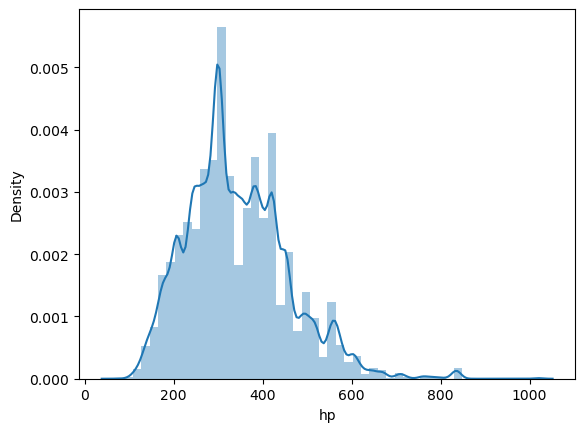

In [82]:
sns.distplot(df['hp']
            )

In [76]:
## cylinder: mean and median--> skew and graph: --> rule
## litre: mean and median--> skew and graph: --> rule
## hp: mean and median--> skew and graph: --> rule

<Axes: xlabel='cyclinder', ylabel='Density'>

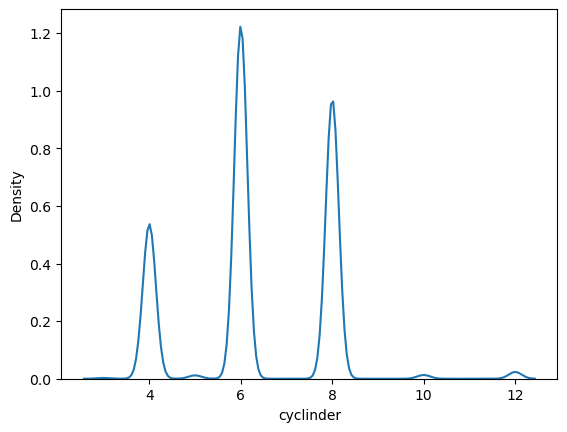

In [66]:
sns.kdeplot(df['cyclinder'])

In [39]:
# ----------------------------------------------------------------------------------------------------------------------------

In [40]:
#### ext_col	int_col------------------>

In [41]:
# EDA

In [42]:
df['ext_col'].unique()

array(['Yellow', 'Silver', 'Blue', 'Black', 'White',
       'Snowflake White Pearl Metallic', 'Gray', 'Green',
       'Santorini Black Metallic', 'Purple', 'Ebony Twilight Metallic',
       'Red', 'Magnetite Black Metallic', 'Diamond Black', 'Vega Blue',
       'Beige', 'Gold', 'Platinum White Pearl', 'Metallic',
       'White Frost Tri-Coat', 'Firecracker Red Clearcoat',
       'Phytonic Blue Metallic', 'Blu', 'Orange', 'Brown',
       'Brilliant Silver Metallic', 'Black Raven', 'Black Clearcoat',
       'Firenze Red', 'Agate Black Metallic', 'Glacial White Pearl',
       'Majestic Plum Metallic', 'designo Diamond White Metallic',
       'Oxford White', 'Black Sapphire Metallic', 'Mythos Black',
       'Granite Crystal Clearcoat Metallic', 'White Diamond Tri-Coat',
       'Magnetite Gray Metallic', 'Carpathian Grey Premium Metallic',
       'designo Diamond White Bright',
       'Phantom Black Pearl Effect / Black Roof', 'Nebula Gray Pearl',
       'Deep Crystal Blue Mica', 'Flame Red

In [43]:
df['int_col'].unique()

array(['Gray', 'Beige', 'Black', '–', 'Blue', 'White', 'Red', 'Brown',
       'Dark Galvanized', 'Parchment.', 'Boulder', 'Orange',
       'Medium Earth Gray', 'Ebony', 'Canberra Beige', 'Jet Black',
       'Silver', 'Light Platinum / Jet Black', 'Macchiato/Magmagrey',
       'Gold', 'Cloud', 'Rioja Red', 'Global Black', 'Green',
       'Medium Stone', 'Navy Pier', 'Dark Ash', 'BLACK', 'Portland',
       'Sandstone', 'Canberra Beige/Black', 'Diesel Gray / Black',
       'Sarder Brown', 'Black Onyx', 'White / Brown', 'Black/Gun Metal',
       'Slate', 'Satin Black', 'Macchiato Beige/Black', 'Charcoal',
       'Black / Express Red', 'Cappuccino', 'Aragon Brown', 'Parchment',
       'Oyster W/Contrast', 'Adrenaline Red', 'Ebony.', 'Shara Beige',
       'Graystone', 'Pearl Beige', 'Nero Ade', 'Graphite',
       'Tan/Ebony/Ebony', 'Charcoal Black', 'Medium Ash Gray',
       'Ebony Black', 'Light Titanium', 'Sakhir Orange', 'Tan',
       'Rock Gray', 'Brandy', 'Carbon Black', 'Amber',
      

In [44]:
len(df['int_col'].unique())

156

In [45]:
len(df['ext_col'].unique())

319

In [46]:
# df.drop(columns=['int_col'],inplace=True) ## removing int_col due to partial dependency

In [47]:
df.head()

,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,hp,litre,cyclinder
0,MINI,Cooper S Base,2007,213000,Gasoline,A/T,Yellow,Gray,None reported,Yes,4200,172.0,1.6,4.0
1,Lincoln,LS V8,2002,143250,Gasoline,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,252.0,3.9,8.0
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,A/T,Blue,Gray,None reported,Yes,13900,320.0,5.3,8.0
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,420.0,5.0,8.0
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,7-Speed A/T,Black,Beige,None reported,Yes,97500,208.0,2.0,4.0


In [48]:
# ----------------------------------------------------------------------------------------------------------------------------

In [49]:
### Transmission------------------------->

In [50]:
df['transmission'].unique()

array(['A/T', 'Transmission w/Dual Shift Mode', '7-Speed A/T',
       '8-Speed A/T', '10-Speed Automatic', '1-Speed A/T', '6-Speed A/T',
       '10-Speed A/T', '9-Speed A/T', '8-Speed Automatic',
       '9-Speed Automatic', '5-Speed A/T', 'Automatic',
       '7-Speed Automatic with Auto-Shift', 'CVT Transmission',
       '5-Speed M/T', 'M/T', '6-Speed M/T', '6-Speed Automatic',
       '4-Speed Automatic', '7-Speed M/T', '2-Speed A/T',
       '1-Speed Automatic', 'Automatic CVT', '4-Speed A/T',
       '6-Speed Manual', 'Transmission Overdrive Switch',
       '8-Speed Automatic with Auto-Shift', '7-Speed Manual',
       '7-Speed Automatic', '9-Speed Automatic with Auto-Shift',
       '6-Speed Automatic with Auto-Shift',
       '6-Speed Electronically Controlled Automatic with O', 'F', 'CVT-F',
       '8-Speed Manual', 'Manual', '–', '2', '6 Speed At/Mt',
       '5-Speed Automatic', '2-Speed Automatic', '8-SPEED A/T', '7-Speed',
       'Variable', 'Single-Speed Fixed Gear', '8-SPEED AT',


In [51]:
len(df['transmission'].unique())

52

In [52]:
at_trans = df[df['transmission'] == 'A/T'][['transmission','price']]

In [53]:
at_trans.head()

,transmission,price
0,A/T,4200
1,A/T,4999
2,A/T,13900
5,A/T,29950
7,A/T,12500
